<a href="https://colab.research.google.com/github/kamangirkhan/Data/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arash Nateghian

Do the mean vo2_max scores for athletes differ between runners and cyclists by much? If so, what does that mean / tell us?

VO2_max is the maximum amount of oxygen your body can effectively use during intense exercise.
It is one of the strongest indicators of cardiorespiratory fitness, endurance capacity, and long-term health.
A higher VO2_max means the body is more efficient at delivering and using oxygen during hard exercise.

Mean VO2_max for Runners : 62.96
Mean VO2_max for Cyclists: 62.20
Difference (Running − Cycling): 0.77

=== Independent Samples t-test (Runners vs Cyclists) ===
t-statistic: 2.535
p-value:     0.0113

Interpretation:
• The mean VO2_max values are extremely close; there is no meaningful difference in aerobic capacity.
• Statistically: the difference is unlikely due to random chance (p < 0.05).
• Direction: in this sample, runners have slightly higher VO2_max than cyclists.



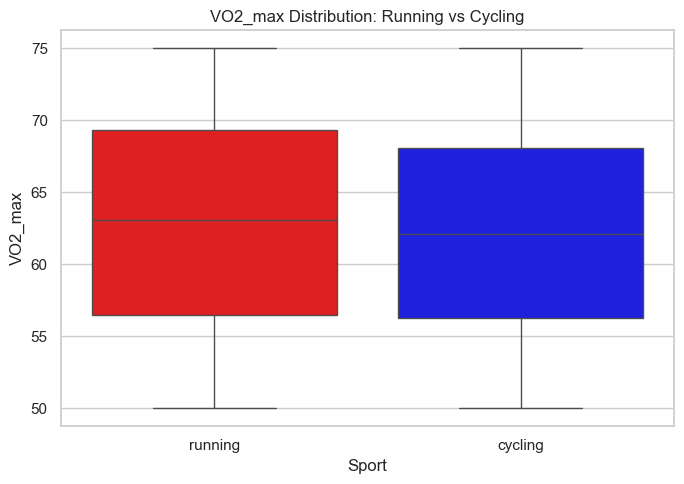

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import re
from scipy.stats import ttest_ind, pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
from bs4 import BeautifulSoup


# Load dataset

df = pd.read_csv("Cross_sport_selection_data.csv")

sport_colors = {"running": "red", "cycling": "blue", "rowing": "green"}



# 1) Question: "Do the mean VO2_max scores differ between runners and cyclists? If so, what does that tell us?"


# VO2max explanation (keep this in the first chunk)
print("VO2_max is the maximum amount of oxygen your body can effectively use during intense exercise.")
print("It is one of the strongest indicators of cardiorespiratory fitness, endurance capacity, and long-term health.")
print("A higher VO2_max means the body is more efficient at delivering and using oxygen during hard exercise.\n")

# Filter for each sport
runners  = df[df["sport"] == "running"]["vo2_max"].dropna()
cyclists = df[df["sport"] == "cycling"]["vo2_max"].dropna()

# Mean values
mean_run = runners.mean()
mean_cyc = cyclists.mean()

print(f"Mean VO2_max for Runners : {mean_run:.2f}")
print(f"Mean VO2_max for Cyclists: {mean_cyc:.2f}")
print(f"Difference (Running − Cycling): {mean_run - mean_cyc:.2f}")

# Statistical test: Are means significantly different?
t_stat, p_val = ttest_ind(runners, cyclists, equal_var=False)

print("\n=== Independent Samples t-test (Runners vs Cyclists) ===")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value:     {p_val:.4f}")

print("\nInterpretation:")
diff = abs(mean_run - mean_cyc)
if diff < 1:
    print("• The mean VO2_max values are extremely close; there is no meaningful difference in aerobic capacity.")
elif diff < 3:
    print("• There is a small difference, but it does not suggest a major physiological gap between the sports.")
else:
    print("• There is a substantial difference, suggesting distinct aerobic demands or selection effects.")

if p_val < 0.05:
    print("• Statistically: the difference is unlikely due to random chance (p < 0.05).")
else:
    print("• Statistically: the difference is not significant (p ≥ 0.05).")

if mean_run > mean_cyc:
    print("• Direction: in this sample, runners have slightly higher VO2_max than cyclists.\n")
else:
    print("• Direction: in this sample, cyclists have slightly higher VO2_max than runners.\n")

# Visualization: VO2_max distribution
df_sub = df[df["sport"].isin(["running", "cycling"])].copy()
colors = {"running": "red", "cycling": "blue"}

plt.figure(figsize=(7, 5))
sns.boxplot(
    data=df_sub,
    x="sport",
    y="vo2_max",
    hue="sport",            # needed to match palette dict
    palette=colors,
    legend=False
)
plt.title("VO2_max Distribution: Running vs Cycling")
plt.xlabel("Sport")
plt.ylabel("VO2_max")
plt.tight_layout()
plt.show()

For female athletes, does training_years correlate with skiing_potential, how about in comparison to male athletes?


Gender values in dataset: ['M' 'F']

=== FEMALE ATHLETES ===
Valid data points: 1739
Pearson r  = -0.0044, p = 0.8546
Spearman r = -0.0055, p = 0.8201

=== MALE ATHLETES ===
Valid data points: 1735
Pearson r  = -0.0310, p = 0.1973
Spearman r = -0.0309, p = 0.1989


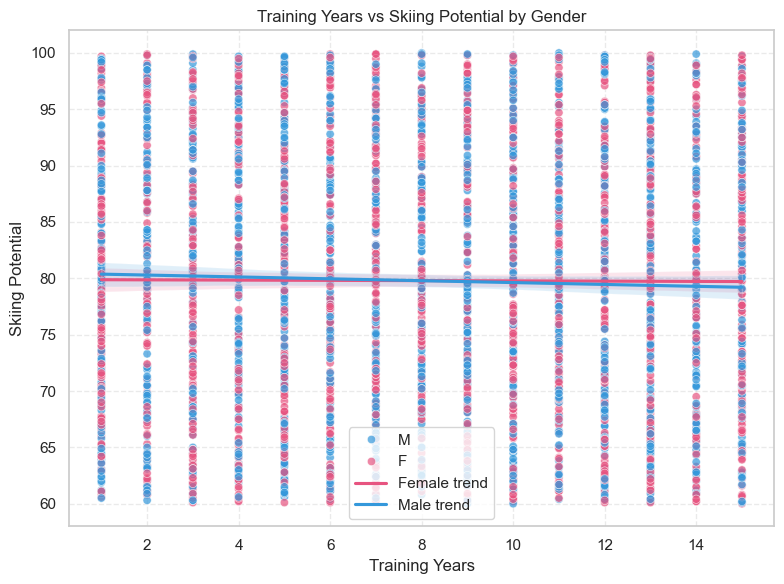

In [ ]:
# 2) Gender-specific correlation:
#    "For female athletes, does training_years correlate with skiing_potential, and how does that compare to male athletes?"

# Check actual gender labels
print("\nGender values in dataset:", df["gender"].unique())

# Build clean subsets
female = df[df["gender"] == "F"][["training_years", "skiing_potential"]].dropna()
male   = df[df["gender"] == "M"][["training_years", "skiing_potential"]].dropna()
# Store correlations explicitly so later sections can use them
pear_female = pearsonr(female["training_years"], female["skiing_potential"])[0]
pear_male   = pearsonr(male["training_years"],   male["skiing_potential"])[0]


def report_corr(label, data):
    n = len(data)
    print(f"\n=== {label.upper()} ATHLETES ===")
    print(f"Valid data points: {n}")

    if n < 2:
        print("Not enough data to compute correlation.")
        return

    pear = pearsonr(data["training_years"], data["skiing_potential"])
    spear = spearmanr(data["training_years"], data["skiing_potential"])

    print(f"Pearson r  = {pear[0]:.4f}, p = {pear[1]:.4f}")
    print(f"Spearman r = {spear[0]:.4f}, p = {spear[1]:.4f}")

report_corr("female", female)
report_corr("male",   male)

# Visualization: training_years vs skiing_potential by gender
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="training_years",
    y="skiing_potential",
    hue="gender",
    palette={"F": "#e75480", "M": "#3498db"},
    alpha=0.7
)

# Trend lines only if we have enough points
if len(female) >= 2:
    sns.regplot(
        data=female,
        x="training_years", y="skiing_potential",
        scatter=False, color="#e75480", label="Female trend"
    )

if len(male) >= 2:
    sns.regplot(
        data=male,
        x="training_years", y="skiing_potential",
        scatter=False, color="#3498db", label="Male trend"
    )

plt.title("Training Years vs Skiing Potential by Gender")
plt.xlabel("Training Years")
plt.ylabel("Skiing Potential")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

In athletes who scored higher than or equal to 8. 5 performance score, which are the three highest combination of sport and gender?


Top 3 sport–gender combinations among athletes with performance_score ≥ 8.5:
     sport gender  count        label
1  cycling      M    322  cycling (M)
0  cycling      F    304  cycling (F)
3   rowing      M    296   rowing (M)


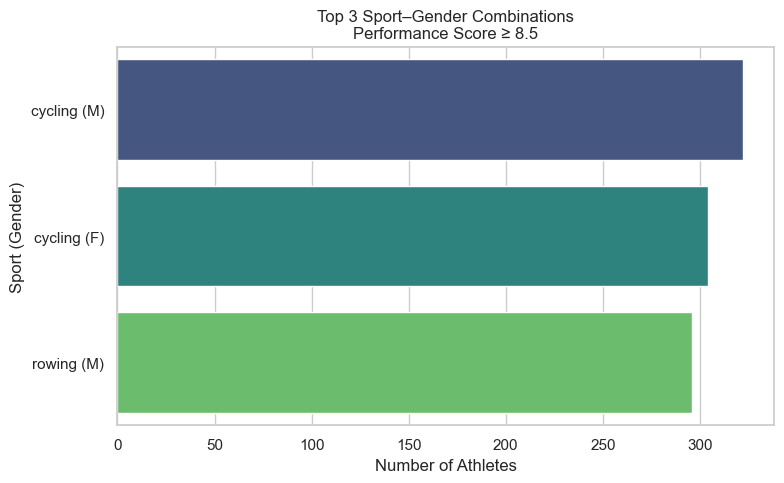

In [ ]:
# 3) High performers:
#    "In athletes with performance_score ≥ 8.5, which are the three most common sport–gender combinations?"

# Filter high-performance athletes
high_perf = df[df["performance_score"] >= 8.5].copy()

# Count sport–gender combinations
combo_counts = (
    high_perf.groupby(["sport", "gender"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)

top3 = combo_counts.head(3).copy()
top3["label"] = top3["sport"] + " (" + top3["gender"] + ")"

print("\nTop 3 sport–gender combinations among athletes with performance_score ≥ 8.5:")
print(top3)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(
    data=top3,
    x="count",
    y="label",
    hue="label",        # required when using palette-like behavior
    legend=False,
    palette="viridis"
)
plt.title("Top 3 Sport–Gender Combinations\nPerformance Score ≥ 8.5")
plt.xlabel("Number of Athletes")
plt.ylabel("Sport (Gender)")
plt.tight_layout()
plt.show()

What training patterns (age, training_years) characterize athletes in each sport?

          count       mean       std   min   25%   50%   75%   max
sport                                                             
cycling  1205.0  26.775104  5.155397  18.0  22.0  27.0  31.0  35.0
rowing   1157.0  26.748487  5.217900  18.0  22.0  27.0  31.0  35.0
running  1112.0  26.667266  5.241159  18.0  22.0  27.0  31.0  35.0


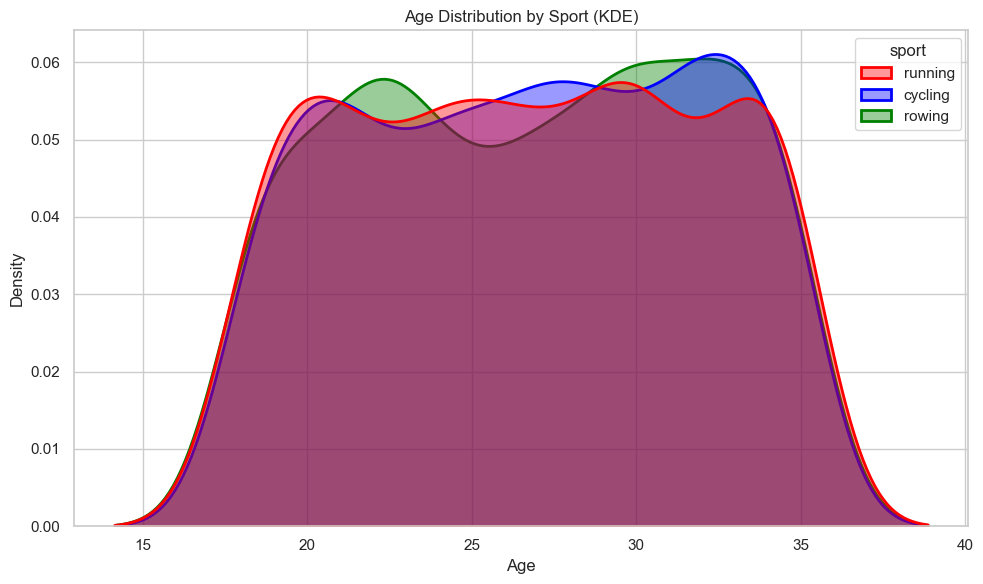

In [ ]:

# 1) Age distribution by sport

age_summary = df.groupby("sport")["age"].describe()
print(age_summary)


plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x="age",
    hue="sport",
    fill=True,
    common_norm=False,
    alpha=0.4,
    linewidth=2,
    palette=sport_colors
)
plt.title("Age Distribution by Sport (KDE)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Which physiological variables differ significantly between rowers, cyclists, and runners (e.g., VO2max, lactate threshold, HRV), and which variables most strongly distinguish one sport from another?

           vo2_max  lactate_threshold        hrv
sport                                           
cycling  62.195270          79.870788  79.782158
rowing   62.374417          80.001037  80.490233
running  62.960342          79.855396  79.690827


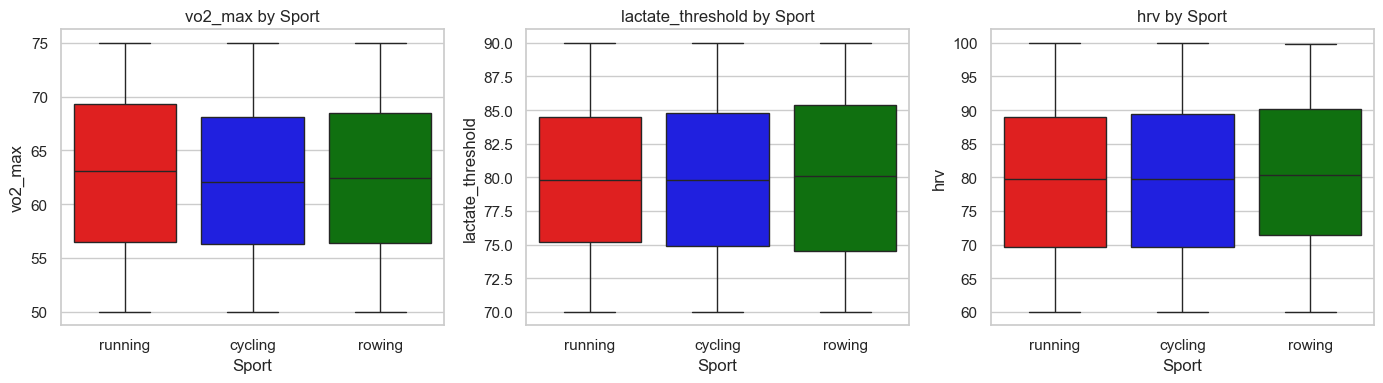

In [ ]:
# 2) Physiological differences

phys_vars = ["vo2_max", "lactate_threshold", "hrv"]
print(df.groupby("sport")[phys_vars].mean())

plt.figure(figsize=(14, 4))
for i, var in enumerate(phys_vars, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(
        data=df,
        x="sport",
        y=var,
        hue="sport",
        palette=sport_colors,
        legend=False
    )
    plt.title(f"{var} by Sport")
    plt.xlabel("Sport")
    plt.ylabel(var)

plt.tight_layout()
plt.show()


“What are the relationships among key physiological and performance-related variables in athletes across running, cycling, and rowing?”

                      age  training_years  vo2_max  lactate_threshold    hrv  \
age                 1.000           0.027    0.025             -0.010 -0.006   
training_years      0.027           1.000    0.013             -0.033  0.001   
vo2_max             0.025           0.013    1.000             -0.001  0.021   
lactate_threshold  -0.010          -0.033   -0.001              1.000 -0.014   
hrv                -0.006           0.001    0.021             -0.014  1.000   
stride_length       0.001           0.003    0.021              0.004 -0.008   
cadence            -0.009          -0.014    0.004             -0.008 -0.017   
force_application  -0.006          -0.037   -0.004              0.016  0.005   
adaptability_score -0.007           0.006   -0.036             -0.011  0.019   
skiing_potential   -0.011          -0.017   -0.025              0.001 -0.016   
performance_score  -0.001           0.003   -0.021             -0.011 -0.003   

                    stride_length  cade

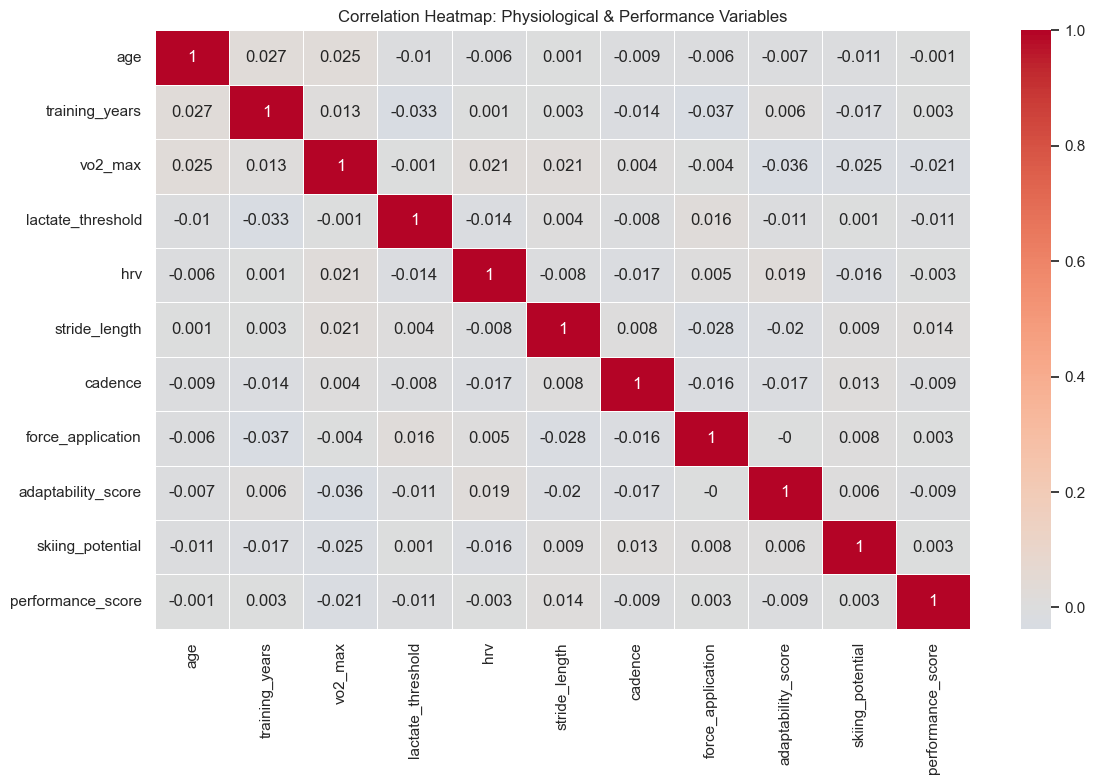

In [ ]:

# 3) Correlation heatmap

vars_to_use = [
    "age", "training_years", "vo2_max", "lactate_threshold", "hrv",
    "stride_length", "cadence", "force_application",
    "adaptability_score", "skiing_potential", "performance_score"
]

corr = df[vars_to_use].corr().round(3)
print(corr)

# --- Visualization ---
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Heatmap: Physiological & Performance Variables")
plt.tight_layout()
plt.show()

Word cloud 1 – weights:
Running_age: 26.67
Cycling_age: 26.78
Rowing_age: 26.75
Running_training: 8.21
Cycling_training: 7.90
Rowing_training: 8.09
Running_VO2max: 62.96
Cycling_VO2max: 62.20
Rowing_VO2max: 62.37
Running_Lactate: 79.86
Cycling_Lactate: 79.87
Rowing_Lactate: 80.00
Running_HRV: 79.69
Cycling_HRV: 79.78
Rowing_HRV: 80.49
Overall_correlations_weak: 20.36


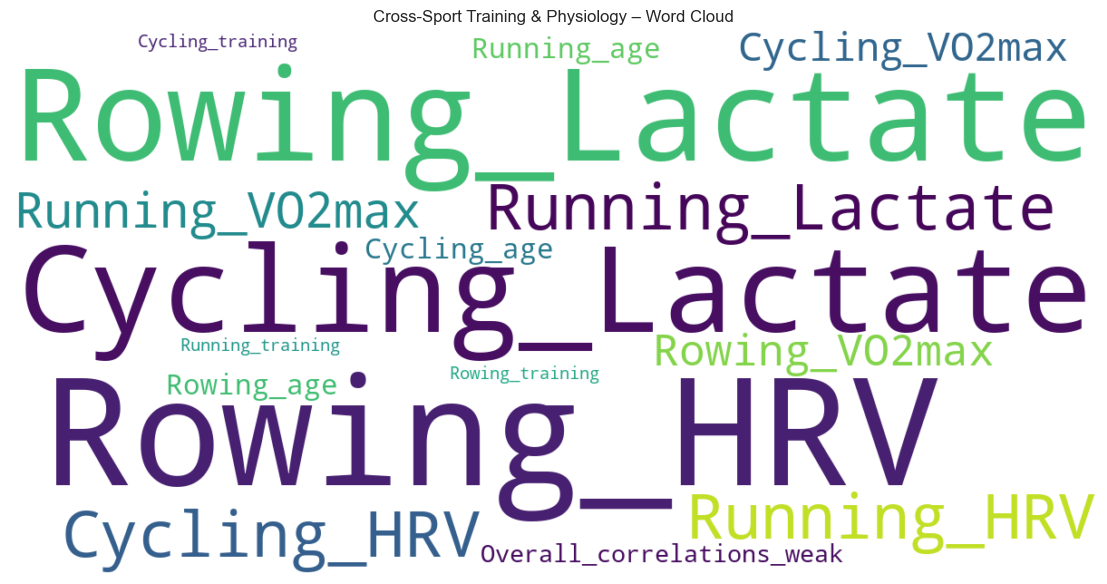

In [ ]:
# Word Cloud – Training & Physiology Overview


# Average training years by sport
train_summary = df.groupby("sport")["training_years"].mean()

# Average physiology by sport (already printed above)
phys_means = df.groupby("sport")[phys_vars].mean()

# Overall correlation strength (average absolute correlation)
overall_corr_strength = corr.abs().mean().mean()

weights_q1 = {
    # Age patterns
    "Running_age":   age_summary.loc["running", "mean"],
    "Cycling_age":   age_summary.loc["cycling", "mean"],
    "Rowing_age":    age_summary.loc["rowing", "mean"],

    # Training experience
    "Running_training": train_summary.loc["running"],
    "Cycling_training": train_summary.loc["cycling"],
    "Rowing_training":  train_summary.loc["rowing"],

    # Physiology by sport
    "Running_VO2max":  phys_means.loc["running", "vo2_max"],
    "Cycling_VO2max":  phys_means.loc["cycling", "vo2_max"],
    "Rowing_VO2max":   phys_means.loc["rowing", "vo2_max"],

    "Running_Lactate": phys_means.loc["running", "lactate_threshold"],
    "Cycling_Lactate": phys_means.loc["cycling", "lactate_threshold"],
    "Rowing_Lactate":  phys_means.loc["rowing", "lactate_threshold"],

    "Running_HRV":     phys_means.loc["running", "hrv"],
    "Cycling_HRV":     phys_means.loc["cycling", "hrv"],
    "Rowing_HRV":      phys_means.loc["rowing", "hrv"],

    # Correlation summary
    "Overall_correlations_weak": float(overall_corr_strength * 200)
}

print("Word cloud 1 – weights:")
for k, v in weights_q1.items():
    print(f"{k}: {v:.2f}")

wc1 = WordCloud(
    width=1200,
    height=600,
    background_color="white"
).generate_from_frequencies(weights_q1)

plt.figure(figsize=(12, 6))
plt.imshow(wc1, interpolation="bilinear")
plt.axis("off")
plt.title("Cross-Sport Training & Physiology – Word Cloud")
plt.tight_layout()
plt.show()


In [ ]:
def extract_springer_article_text(url, user_agent="Mozilla/5.0"):


    resp = requests.get(url, headers={"User-Agent": user_agent})
    resp.raise_for_status()
    soup = BeautifulSoup(resp.text, "html.parser")


    article_content = (
        soup.find("div", class_=re.compile(r"\bc-article-body\b")) or
        soup.find("section", class_=re.compile(r"\bc-article-body\b")) or
        soup.find("article", class_=re.compile(r"\bc-article\b")) or
        soup.find("main")  # fallback
    )

    if article_content is None:
        article_content = soup


    drop_selectors = [
        "figure",
        "table",
        "aside",
        "nav",
        "header",
        "footer",
        ".c-article-info",
        ".c-article-metadata",
        ".c-article-references",
        ".c-article-right-col",
        ".c-article-access",     # access/metrics panels
        ".c-bibliographic-information"
    ]

    for sel in drop_selectors:
        for node in article_content.select(sel):
            node.decompose()

        for sup in article_content.find_all("sup"):
        sup.decompose()

    for a in article_content.find_all("a"):

        if a.get("href", "").startswith("#") or \
           re.search(r"(ref|note|cite)", " ".join(a.get("class", [])), re.I):
            a.decompose()


    paragraphs = []
    for p in article_content.find_all("p"):
        txt = p.get_text(" ", strip=True)
        if txt:
            paragraphs.append(txt)

    raw_text = "\n".join(paragraphs)

    # --- 4) Clean citation patterns like [1], [2–4], (1), (2–3) ---
    raw_text = re.sub(r"\[\s*\d+(?:\s*[-–,]\s*\d+)*\s*\]", "", raw_text)
    raw_text = re.sub(r"\(\s*\d+(?:\s*[-–,]\s*\d+)*\s*\)", "", raw_text)


    raw_text = re.sub(r"\n{2,}", "\n\n", raw_text).strip()

    return raw_text

url = "https://www.frontiersin.org/journals/physiology/articles/10.3389/fphys.2021.741573/full"
skiing_article_text = extract_springer_article_text(url)
print(skiing_article_text[:2000], "...\n")


ORIGINAL RESEARCH article
Front. Physiol. , 11 October 2021
Sec. Exercise Physiology
Volume 12 - 2021 | https://doi.org/10.3389/fphys.2021.741573
The purposes of our study were to investigate the physiological and biomechanical responses to low-intensity (LI) and high-intensity (HI) roller ski skating on varying terrain and compare these responses between training intensities. Nine elite male skiers performed treadmill roller skiing consisting of two 21 min sessions (7 × 3 min laps) at LI and HI with the same set inclines and intensity-dependent speeds (LI/HI: distance: 5.8/7.5 km, average speed: 16.7/21.3 km/h). Physiological and biomechanical variables were measured continuously, and each movement cycle and sub-technique employed were detected and classified with a machine learning model. Both the LI and HI sessions induced large terrain-dependent fluctuations (relative to the maximal levels) in heart rate (HR, 17.7 vs. 12.2%-points), oxygen uptake ( V . O 2 , 33.0 vs. 31.7%-points),